In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings                                 
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test_id = test_df['Id']

### Исследование датасета 

In [6]:
train_df.shape

(1460, 81)

In [7]:
test_df.shape

(1459, 80)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train_df.drop(['Id'], axis = 1, inplace = True)
test_df.drop(['Id'], axis = 1, inplace = True)

In [11]:
train_df.describe(include = ['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


### Поиск и замена пропущенных значений 

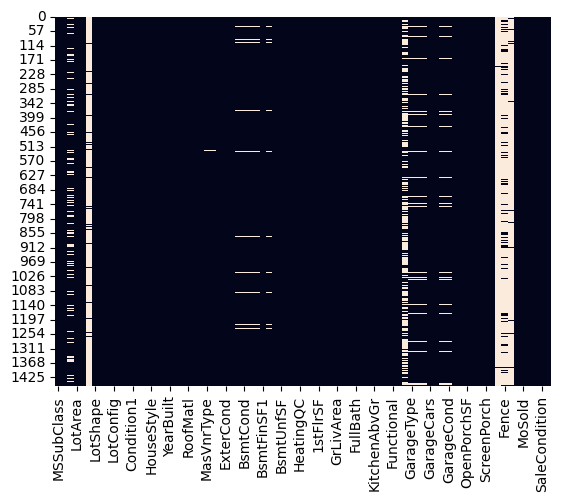

In [12]:
sns.heatmap(train_df.isnull(), cbar = False);

In [13]:
# Поиск пропущенных значений в процентах от общего кол-ва строк


for col in train_df.columns:
    if train_df[col].isnull().sum() > 0:
        print(col, round((train_df[col].isnull().sum() / train_df.shape[0]) * 100, 1),'%' , train_df[col].dtypes)
        
            
        

LotFrontage 17.7 % float64
Alley 93.8 % object
MasVnrType 0.5 % object
MasVnrArea 0.5 % float64
BsmtQual 2.5 % object
BsmtCond 2.5 % object
BsmtExposure 2.6 % object
BsmtFinType1 2.5 % object
BsmtFinType2 2.6 % object
Electrical 0.1 % object
FireplaceQu 47.3 % object
GarageType 5.5 % object
GarageYrBlt 5.5 % float64
GarageFinish 5.5 % object
GarageQual 5.5 % object
GarageCond 5.5 % object
PoolQC 99.5 % object
Fence 80.8 % object
MiscFeature 96.3 % object


In [14]:
for col in test_df.columns:
    if test_df[col].isnull().sum() > 0:
        print(col, round((test_df[col].isnull().sum() / test_df.shape[0]) * 100, 1),'%' , test_df[col].dtypes)

MSZoning 0.3 % object
LotFrontage 15.6 % float64
Alley 92.7 % object
Utilities 0.1 % object
Exterior1st 0.1 % object
Exterior2nd 0.1 % object
MasVnrType 1.1 % object
MasVnrArea 1.0 % float64
BsmtQual 3.0 % object
BsmtCond 3.1 % object
BsmtExposure 3.0 % object
BsmtFinType1 2.9 % object
BsmtFinSF1 0.1 % float64
BsmtFinType2 2.9 % object
BsmtFinSF2 0.1 % float64
BsmtUnfSF 0.1 % float64
TotalBsmtSF 0.1 % float64
BsmtFullBath 0.1 % float64
BsmtHalfBath 0.1 % float64
KitchenQual 0.1 % object
Functional 0.1 % object
FireplaceQu 50.0 % object
GarageType 5.2 % object
GarageYrBlt 5.3 % float64
GarageFinish 5.3 % object
GarageCars 0.1 % float64
GarageArea 0.1 % float64
GarageQual 5.3 % object
GarageCond 5.3 % object
PoolQC 99.8 % object
Fence 80.1 % object
MiscFeature 96.5 % object
SaleType 0.1 % object


1. Исходя из представленной информации колонки с пропущенными значениями более 50-ти процентов лучше удалить.
2. В колонках числового типа пропуски заменим на медиану.
3. В клонках типа object пропущенные знчения можно заменить на моду

In [15]:
# Поиск и удаление колок с пропущенными значениями более 50-ти процентов

train_col_to_drop = [col for col in train_df.columns if round((train_df[col].isnull().sum() / train_df.shape[0]) * 100, 1) > 40]

test_col_to_drop = [col for col in test_df.columns if round((test_df[col].isnull().sum() / test_df.shape[0]) * 100, 1) > 40]


if train_col_to_drop == test_col_to_drop:
    print(train_col_to_drop)
else:
    print('train_col: ', train_col_to_drop)
    print('test_col: ', test_col_to_drop)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [16]:
train_df.drop(train_col_to_drop, axis = 1, inplace = True)
test_df.drop(train_col_to_drop, axis = 1, inplace = True)

In [17]:
# Замена пропущенных значений

train_obj_cols = [col for col in train_df if train_df[col].dtypes == 'object']
test_obj_cols = [col for col in test_df if test_df[col].dtypes == 'object']


train_num_cols = [col for col in train_df if col not in train_obj_cols]
test_num_cols = [col for col in test_df if col not in test_obj_cols]

print(f'Колонки с числовыми значениями {train_num_cols}')
print(f'Колонки с категориальными значениями {train_obj_cols}')

Колонки с числовыми значениями ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Колонки с категориальными значениями ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional

In [18]:
train_df.fillna(train_df[train_num_cols].median(), inplace = True)
test_df.fillna(test_df[test_num_cols].median(), inplace = True)

train_df.fillna(train_df[train_obj_cols].mode().iloc[0], inplace = True)
test_df.fillna(test_df[test_obj_cols].mode().iloc[0], inplace = True)

for col in train_df.columns:
    if train_df[col].isnull().sum() > 0:
        print(col, round((train_df[col].isnull().sum() / train_df.shape[0]) * 100, 1),'%' , train_df[col].dtypes)
    else:
        continue
    

### Кодирование переменных 

In [19]:
# Поиск категориальных переменных

for col in train_obj_cols:
    print(f'у колонки {col} кол-во уникальных значений {train_df[col].nunique()}')

у колонки MSZoning кол-во уникальных значений 5
у колонки Street кол-во уникальных значений 2
у колонки LotShape кол-во уникальных значений 4
у колонки LandContour кол-во уникальных значений 4
у колонки Utilities кол-во уникальных значений 2
у колонки LotConfig кол-во уникальных значений 5
у колонки LandSlope кол-во уникальных значений 3
у колонки Neighborhood кол-во уникальных значений 25
у колонки Condition1 кол-во уникальных значений 9
у колонки Condition2 кол-во уникальных значений 8
у колонки BldgType кол-во уникальных значений 5
у колонки HouseStyle кол-во уникальных значений 8
у колонки RoofStyle кол-во уникальных значений 6
у колонки RoofMatl кол-во уникальных значений 8
у колонки Exterior1st кол-во уникальных значений 15
у колонки Exterior2nd кол-во уникальных значений 16
у колонки MasVnrType кол-во уникальных значений 4
у колонки ExterQual кол-во уникальных значений 4
у колонки ExterCond кол-во уникальных значений 5
у колонки Foundation кол-во уникальных значений 6
у колонки 

In [20]:
train_df.shape

(1460, 75)

In [21]:
test_df.shape

(1459, 74)

# Кодирование переменных

In [22]:
# Убираем целевую переменную

target = train_df['SalePrice']

train_df.drop(['SalePrice'], axis = 1, inplace = True)

In [23]:
# Комбинирование 2-х датасетов для кодирования

combined_data = pd.concat([train_df, test_df], axis=0)

comb_obj_cols = list(combined_data.select_dtypes(['object']).columns)
comb_num_cols = [col for col in combined_data.columns if col not in comb_obj_cols]

In [24]:
#Перевод категориальных переменных в One-hot Encoding

combined_data_encoded = pd.get_dummies(combined_data, columns = comb_obj_cols, drop_first = True)

combined_data = pd.concat([combined_data.drop(comb_obj_cols, axis = 1), combined_data_encoded.drop(comb_num_cols, axis = 1)], axis = 1)

combined_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
# Разделение обратно на обучающий и тестовый наборы данных

train_df = combined_data[:len(train_df)]
test_df = combined_data[len(train_df):]

In [26]:
# Присоединение целевого признака к обратно к train_df

train_df = pd.concat([train_df, target], axis = 1)
train_df.shape

(1460, 233)

###  Распределение данных

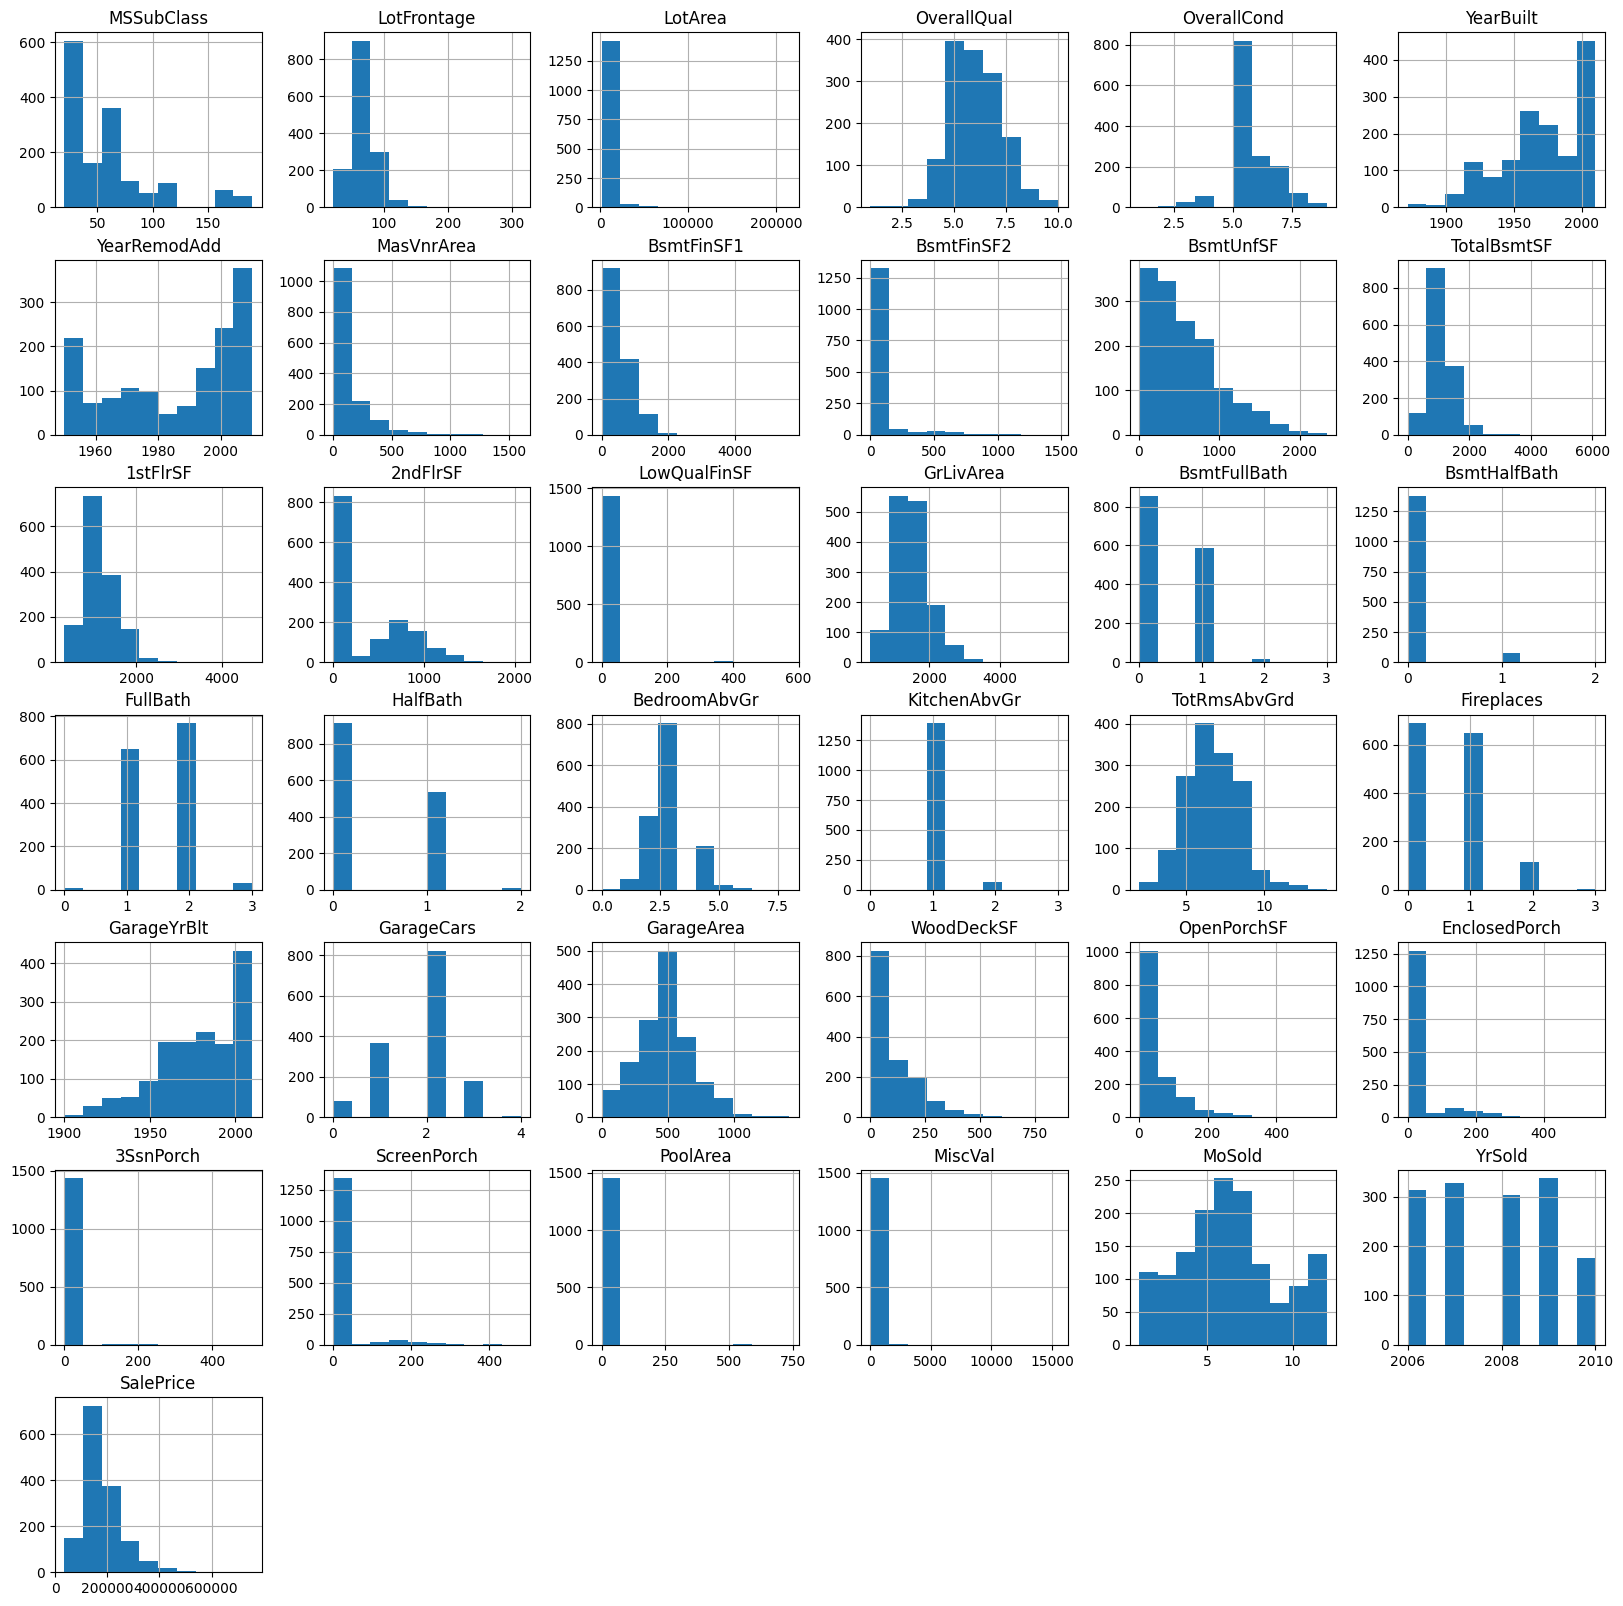

In [27]:
train_df[train_num_cols].hist(figsize = (20, 20));

### Выбросы данных 

In [28]:
len(train_num_cols)

37

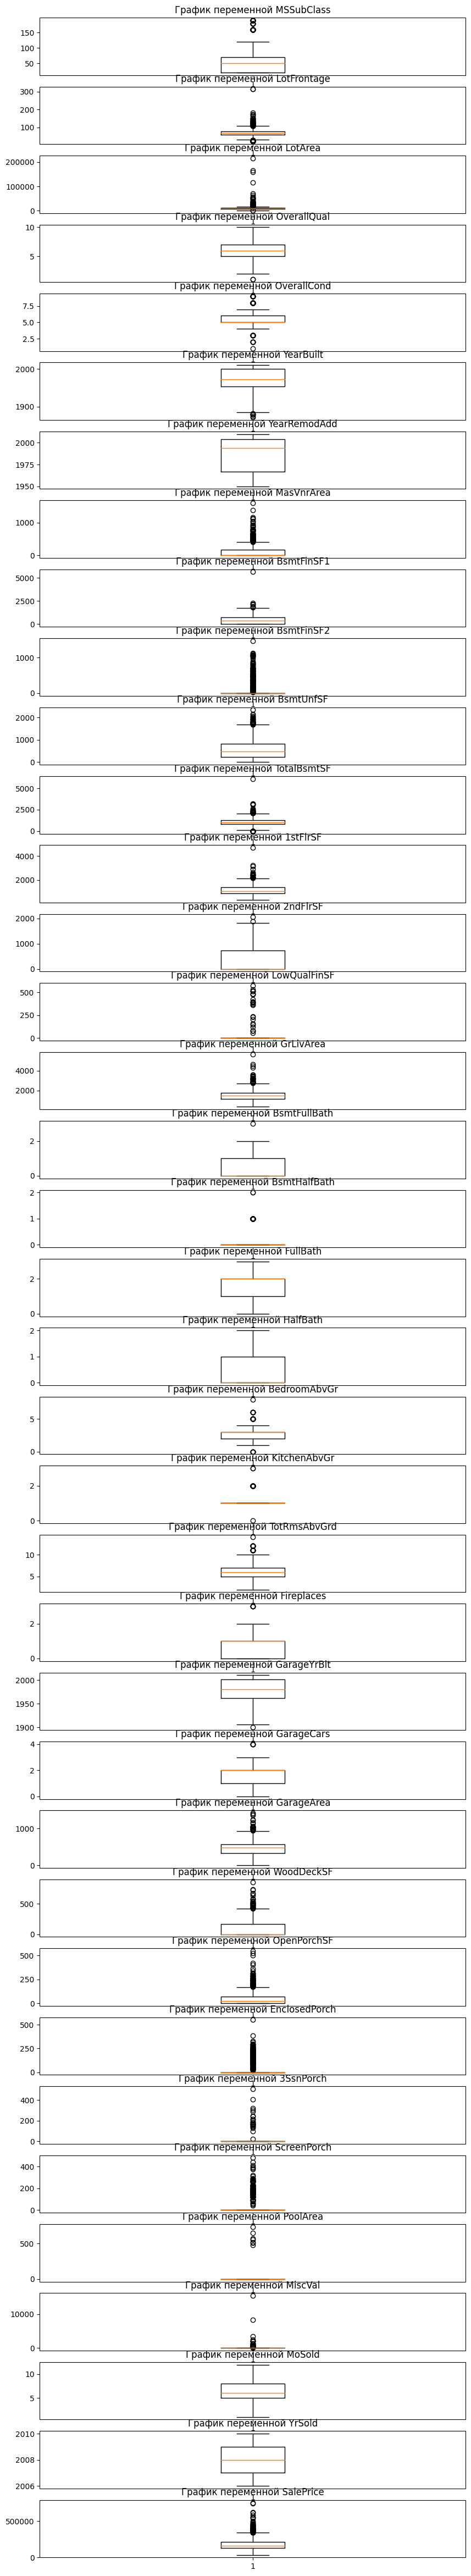

In [29]:
fig, axs = plt.subplots(ncols = 1, nrows = len(train_num_cols), figsize = (10, 60))

for i in range(len(train_num_cols)):
    axs[i].boxplot(train_df[train_num_cols[i]])
    axs[i].set_title(f'График переменной {train_num_cols[i]}')
    
plt.show()

### Корреляция данных 

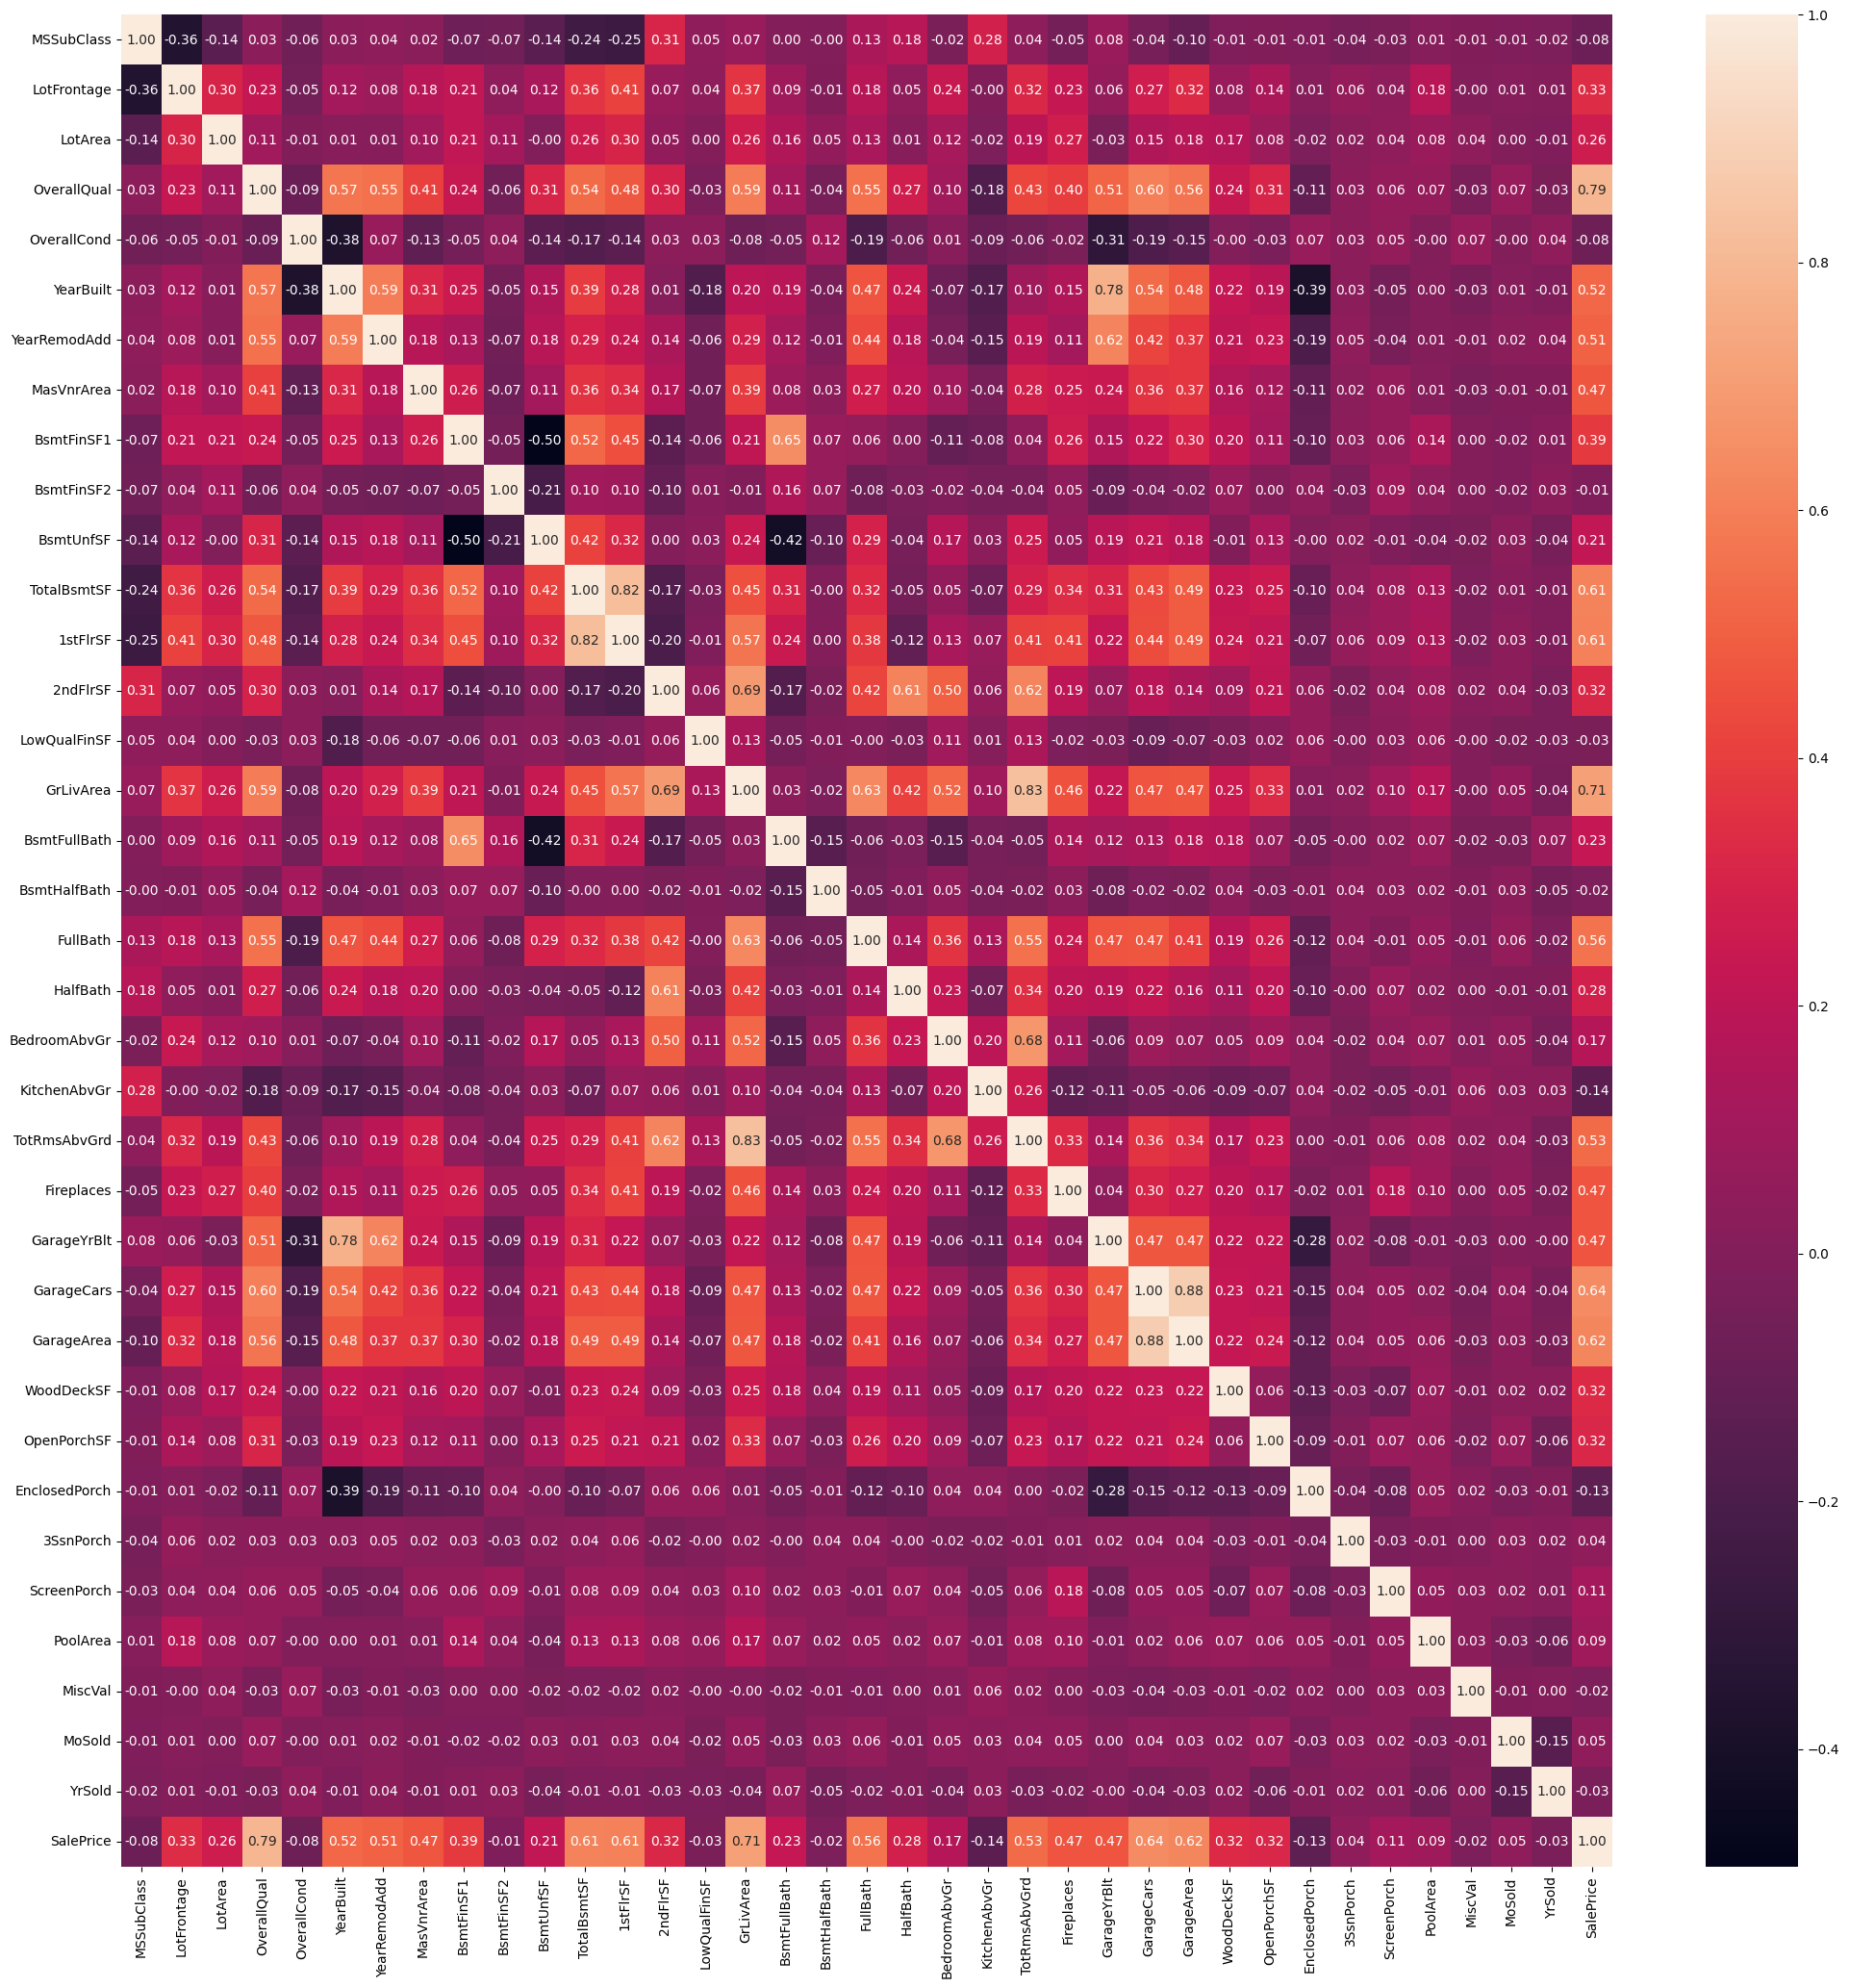

In [30]:
plt.figure(figsize = (25, 25))
sns.heatmap(train_df[train_num_cols].corr(), annot = True, fmt = '.2f')
plt.show()

In [31]:
train_num_cols.index('SalePrice')

36

In [32]:
# Удаляем целевую переменную из списка колонок с числовыми значениями

train_num_cols.remove('SalePrice')


### Выбросы 

In [33]:
for col in train_num_cols:
    #Определение межквартильного размаха
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    #Определение верхней и нижней границы выбросов
    lower_bond = Q1 - IQR * 1.5
    upper_bond = Q3 + IQR * 1.5
    
    #Определение выбросов
    outliers = train_df[(train_df[col] < lower_bond) | (train_df[col] > upper_bond)]
    
    #Замена выбросов 
    train_df.loc[(train_df[col] < lower_bond), col] = lower_bond
    train_df.loc[(train_df[col] > upper_bond), col] = upper_bond

### Разделение данных 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['SalePrice'], axis = 1),
                                                   train_df['SalePrice'],
                                                   test_size = 0.3,
                                                   )

### Шкалирование данных 

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train[train_num_cols])
X_test_num_scaled = scaler.transform(X_test[train_num_cols])

X_train[train_num_cols] = X_train_num_scaled
X_test[train_num_cols] = X_test_num_scaled

# y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
77,0.24,0.243421,0.441792,0.375,0.375,0.508065,0.850000,0.000000,0.188698,0.0,...,0,0,0,0,1,0,0,0,1,0
1229,0.48,0.506579,0.397017,0.375,0.375,0.604839,0.166667,0.000000,0.374026,0.0,...,0,0,0,0,1,0,0,0,1,0
1453,0.00,0.769737,0.971807,0.375,0.375,0.975806,0.933333,0.000000,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
1335,0.00,0.638158,0.504478,0.500,0.375,0.741935,0.450000,0.876712,0.385258,0.0,...,0,0,0,0,1,0,0,0,1,0
302,0.00,1.000000,0.754848,0.625,0.375,0.935484,0.866667,0.365297,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
y_train

77      127000
1229    127000
1453     84500
1335    167900
302     205000
         ...  
959     155000
1425    142000
1223    137900
913     145000
106     100000
Name: SalePrice, Length: 1022, dtype: int64

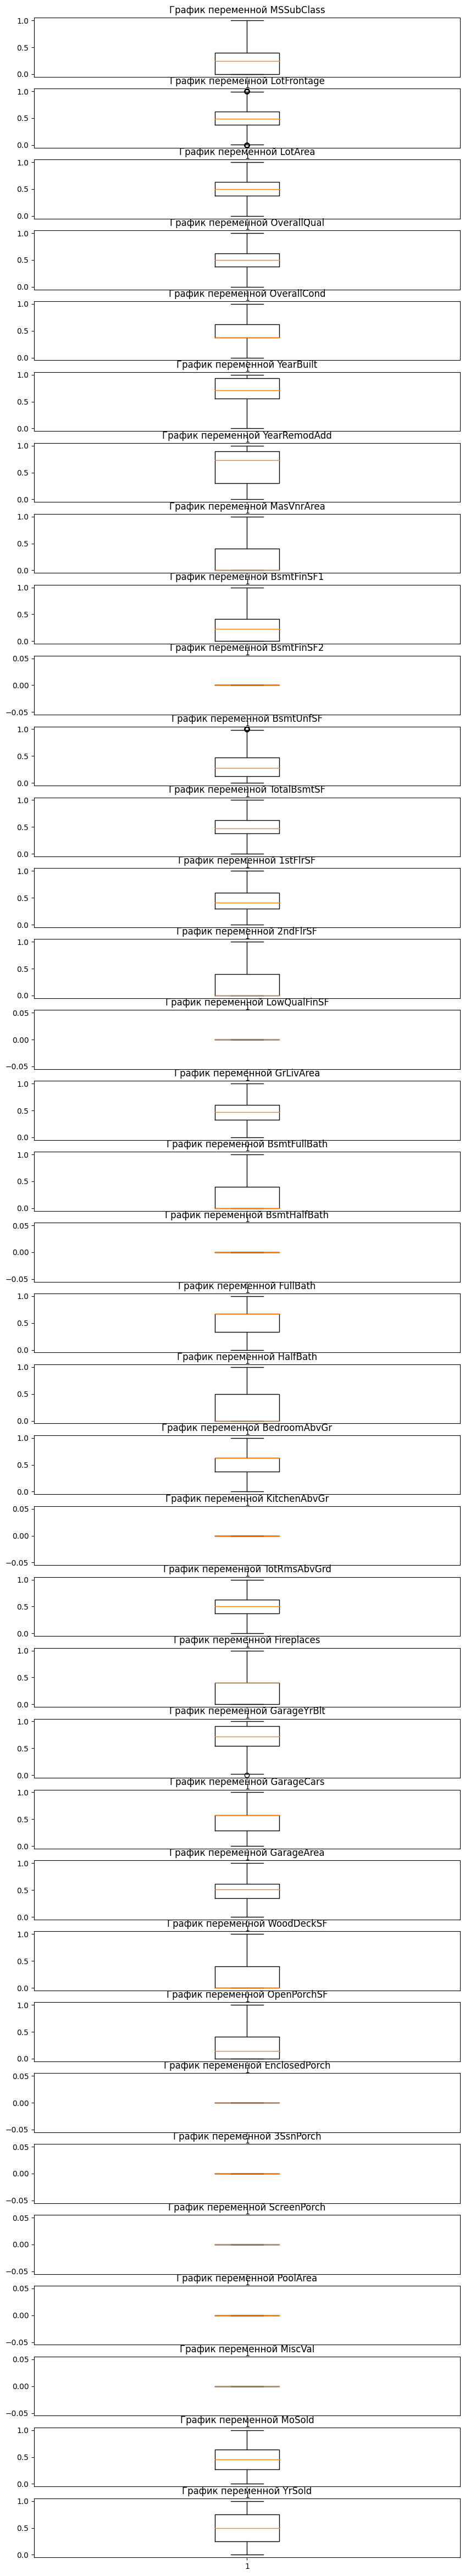

In [37]:
fig, axs = plt.subplots(ncols = 1, nrows = len(train_num_cols), figsize = (10, 60))

for i in range(len(train_num_cols)):
    axs[i].boxplot(X_train[train_num_cols[i]])
    axs[i].set_title(f'График переменной {train_num_cols[i]}')
    
plt.show()

### Baseline 

In [38]:
# Качество базового алгоритма 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

base_reg = LinearRegression()

base_reg.fit(X_train, y_train)

base_reg_prediction = base_reg.predict(X_test)


print('Показатель RMSE модели {} равен {:.3f}'.format('LinearRegression', np.sqrt(mean_squared_error(y_test, base_reg_prediction))))

Показатель RMSE модели LinearRegression равен 60674325979377.367


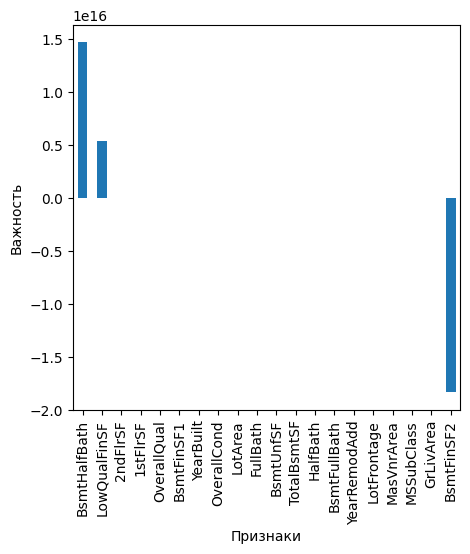

In [39]:
# важность прихнаков у базового алгоритма 

featureImportance = pd.DataFrame({'Признаки': train_df.drop(['SalePrice'], axis = 1).columns,
                                 'Важность': base_reg.coef_.ravel()})

featureImportance = featureImportance.head(20)

featureImportance.set_index('Признаки', inplace = True)
featureImportance.sort_values('Важность', ascending = False, inplace = True)
featureImportance['Важность'].plot(kind = 'bar', figsize = (5, 5))
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.show()

### Lasso

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

model = Lasso(random_state = 17)

lasso_params = {
    'alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 5, 8, 10, 15]
}

lasso_model = GridSearchCV(model, lasso_params, cv = 5)
lasso_model.fit(X_train, y_train)

print(f'Наилучшие параметры aplha {lasso_model.best_params_}')

Наилучшие параметры aplha {'alpha': 15}


In [41]:
lasso_prediction = lasso_model.best_estimator_.predict(X_test)

print('Показатель RMSE модели {} равен {:.3f}'.format('lasso', np.sqrt(mean_squared_error(y_test, lasso_prediction))))

Показатель RMSE модели lasso равен 24147.465


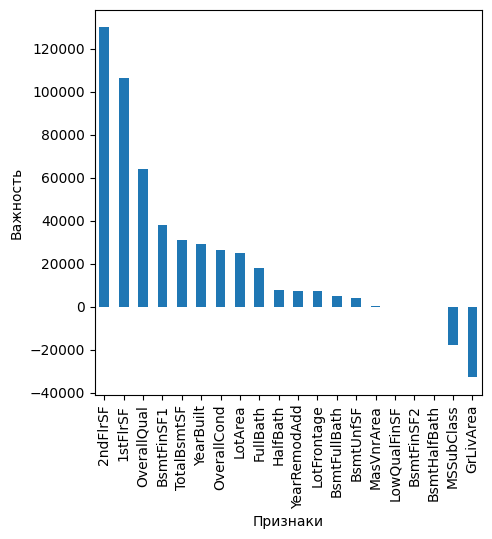

In [42]:
# важность прихнаков у lasso алгоритма 

featureImportance = pd.DataFrame({'Признаки': train_df.drop(['SalePrice'], axis = 1).columns,
                                 'Важность': lasso_model.best_estimator_.coef_.ravel()})

featureImportance = featureImportance.head(20)

featureImportance.set_index('Признаки', inplace = True)
featureImportance.sort_values('Важность', ascending = False, inplace = True)
featureImportance['Важность'].plot(kind = 'bar', figsize = (5, 5))
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.show()

### Стохастический градиентный спуск 

In [43]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(random_state = 17, shuffle = True)

sgdr_params = {
    'loss': ['squared_error', 'squared_epsilon_insensitive', 'huber'],
    'penalty': ['l1', 'l2'],
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.01, 0.025, 0.05],
    'max_iter': [1000, 1500, 2000]
}

sgdr_model = GridSearchCV(model,
                         sgdr_params,
                         cv = 5,
                         n_jobs = -1)

sgdr_model.fit(X_train, y_train)

print(f'Кол-во шагов градиентного спуска {sgdr_model.best_estimator_.n_iter_}, наилучшие параметры {sgdr_model.best_params_}')

Кол-во шагов градиентного спуска 153, наилучшие параметры {'alpha': 0.001, 'eta0': 0.01, 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'l2'}


In [44]:
# Предсказание и ошибка

sgdr_model_prediction = sgdr_model.best_estimator_.predict(X_test)
print('Показатель RMSE модели {} равен {:.3f}'.format('SGDRegressor', np.sqrt(mean_squared_error(y_test, sgdr_model_prediction))))

Показатель RMSE модели SGDRegressor равен 24672.127


### SVR 

In [45]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

model = SVR()

svr_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 5, 10],
    'epsilon': [0.1, 0.2, 0.3, 0.4]
}

svr_model = RandomizedSearchCV(model,
                        svr_params,
                        cv = 5,
                        n_jobs = -1)

svr_model.fit(X_train, y_train)

print(f'Наилучшие параметры алгоритма SVR {svr_model.best_params_}')

Наилучшие параметры алгоритма SVR {'kernel': 'linear', 'epsilon': 0.2, 'C': 10}


In [46]:
# Предсказание и ошибка SVR

svr_model_prediction = svr_model.best_estimator_.predict(X_test)

print('Показатель RMSE модели {} равен {:.3f}'.format('SVR', np.sqrt(mean_squared_error(y_test, svr_model_prediction))))

Показатель RMSE модели SVR равен 64711.633


### RandomForestRegressor 

In [47]:
from sklearn.ensemble import RandomForestRegressor
''
model = RandomForestRegressor(random_state = 17)

forest_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

forest_model = RandomizedSearchCV(model,
                                 forest_params,
                                 cv = 5,
                                 n_jobs = -1)

forest_model.fit(X_train, y_train)

print(f'Наилучшие параметры RandomForestRegressor - {forest_model.best_params_}')

Наилучшие параметры RandomForestRegressor - {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [48]:
# Предсказание и ошибка RandomForestRegressor

forest_model_prediction = forest_model.best_estimator_.predict(X_test)


print('Показатель RMSE модели {} равен {:.3f}'.format('RandomForestRegressor', np.sqrt(mean_squared_error(y_test, forest_model_prediction))))

Показатель RMSE модели RandomForestRegressor равен 23962.797


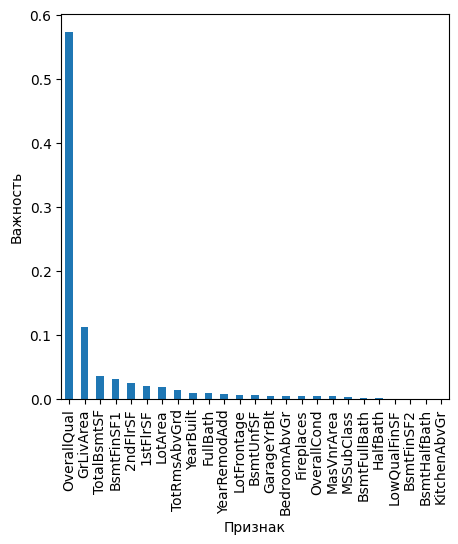

In [49]:
# Визуализация важности признаков

featureImportance = pd.DataFrame({'Признаки': X_train.columns,
                                 'Важность': forest_model.best_estimator_.feature_importances_})


featureImportance = featureImportance.head(25)

featureImportance.set_index('Признаки', inplace = True)
featureImportance.sort_values('Важность', ascending = False, inplace = True)
featureImportance['Важность'].plot(kind = 'bar', figsize = (5, 5))
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.show()

### GradientBoostingRegressor 

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state = 17)

boosting_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5],
    'max_depth': [2, 4, 5, 7, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

boosting_model = RandomizedSearchCV(model,
                                   boosting_params,
                                   cv = 5,
                                   n_jobs = -1)

boosting_model.fit(X_train, y_train)

print(f'Наилучшие параметры GradientBoostingRegressor - {boosting_model.best_params_}')

Наилучшие параметры GradientBoostingRegressor - {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 2, 'learning_rate': 0.25}


In [51]:
# Предсказание и ошибка GradientBoostingRegressor

boosting_model_prediction = boosting_model.best_estimator_.predict(X_test)

print('Показатель RMSE модели {} равен {:.3f}'.format('GradientBoostingRegressor', np.sqrt(mean_squared_error(y_test, boosting_model_prediction))))

Показатель RMSE модели GradientBoostingRegressor равен 22704.494


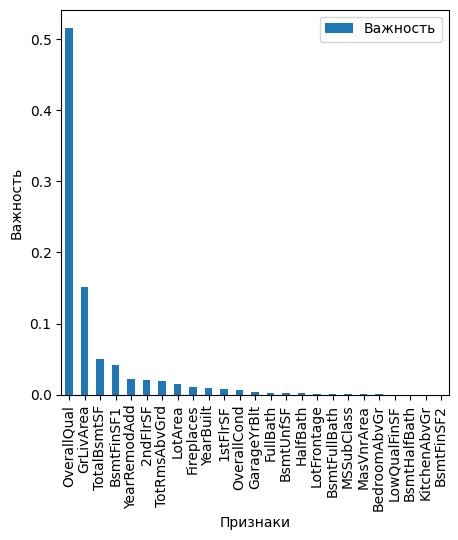

In [52]:
# график важности признаков для GradientBoostingRegressor

featureImportance = pd.DataFrame({'Признаки': X_train.columns,
                                  'Важность': boosting_model.best_estimator_.feature_importances_})

featureImportance = featureImportance.head(25)

featureImportance.set_index('Признаки', inplace = True)
featureImportance.sort_values('Важность', ascending = False, inplace = True)
featureImportance.plot(kind = 'bar', figsize = (5, 5))

plt.xlabel('Признаки')
plt.ylabel('Важность')

plt.show()

In [53]:
test_df.shape

(1459, 232)

### Предсказание для test.csv 

In [54]:
test_prediction = boosting_model.best_estimator_.predict(test_df.values)

print(test_prediction)

[507623.97515378 526016.17793461 672200.53272782 ... 473555.32040196
 485232.36615242 617435.3991082 ]


In [55]:
# Создание датафрейма с предсказанием

predicted_df = pd.DataFrame(np.array([test_id, test_prediction]).T, columns = ['Id', 'SalePrice'])
predicted_df.head()

,Id,SalePrice
0,1461.0,507623.975154
1,1462.0,526016.177935
2,1463.0,672200.532728
3,1464.0,646345.963895
4,1465.0,581089.763296


In [61]:
predicted_df['Id'] = predicted_df['Id'].astype('int32')

In [62]:
predicted_df.to_csv('sample_submission.csv', index = False)